### Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import itertools
from itertools import permutations
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

## Analysis

### 1(a) - Reading the dataset

In [2]:
df = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx", 'Sheet1')
df_copy = df

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### 1(b) - Exploring the data

#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print(f'The number of rows in the dataset are: {len(df)}')
print(f'The number of columns in the dataset are: {len(df.columns)} \n')
print('The columns represent hourly average ambient variables namely - Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V), Energy Output (EP)')
print('The rows represent the average ambient variables data for each hour')

The number of rows in the dataset are: 9568
The number of columns in the dataset are: 5 

The columns represent hourly average ambient variables namely - Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V), Energy Output (EP)
The rows represent the average ambient variables data for each hour


#### ii. Pairwise scatterplots of all the variables in the data set including the predictors

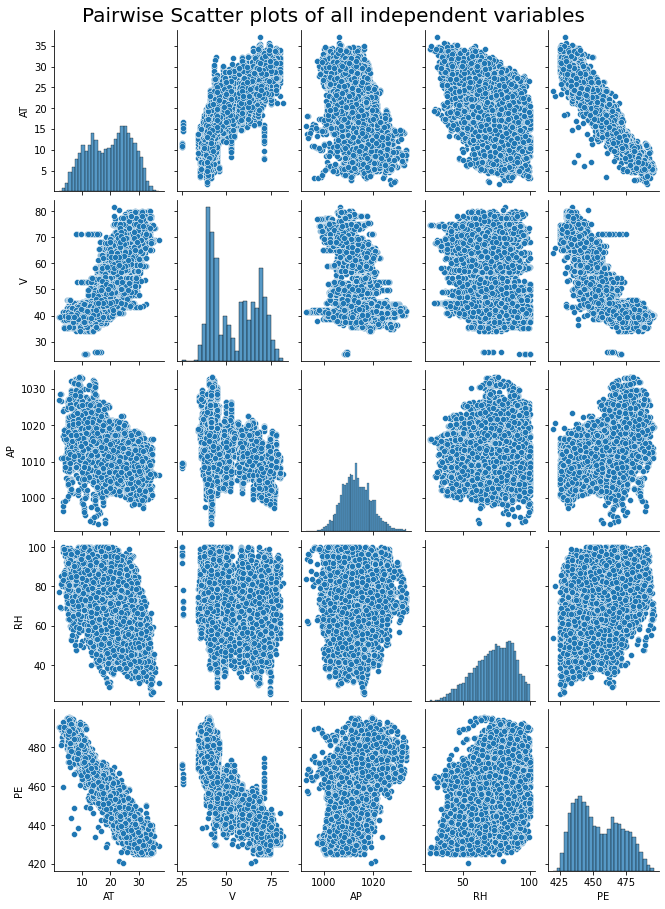

In [4]:
sns.pairplot(df, diag_kind='hist', aspect=0.75)
plt.suptitle('Pairwise Scatter plots of all independent variables', size = 20, y =1.01)
plt.show()

#### iii. Mean, median, range, first and third quartiles, and interquartile ranges of each of the variables

In [5]:
summary_df = pd.DataFrame(df.describe())

# Calculated column list
Range = (df.max() - df.min()).tolist()
FirstQuartile = (df.quantile(0.25)).tolist()
ThirdQuartile = (df.quantile(0.75)).tolist()
InterQuartileRange = (df.quantile(0.75) - df.quantile(0.25)).tolist()

# Filter for necessary indexes 
summary_df_final = summary_df[summary_df.index.isin(['mean','50%','25%','75%'])]

# Converting to lists
summary_df_final.loc[len(summary_df_final.index)] = Range
summary_df_final.loc[len(summary_df_final.index)] = FirstQuartile
summary_df_final.loc[len(summary_df_final.index)] = ThirdQuartile
summary_df_final.loc[len(summary_df_final.index)] = InterQuartileRange

# Final Dataframe
summary_df_final = summary_df_final.rename(index = {4:'Range', 5: 'FirstQuartile', 6: 'ThirdQuartile', 7:'IQR'})

/Users/naveenkumar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [6]:
summary_df_final

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
FirstQuartile,13.510000,41.740000,1009.100000,63.327500,439.750000
ThirdQuartile,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


### 1(c) - Simple linear regression model to predict response for each independent variable


 Simple Linear Regression model results for: AT v/s PE 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:30   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

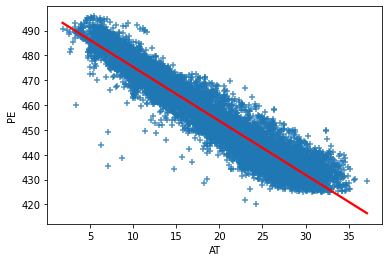


 Simple Linear Regression model results for: V v/s PE 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:31   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

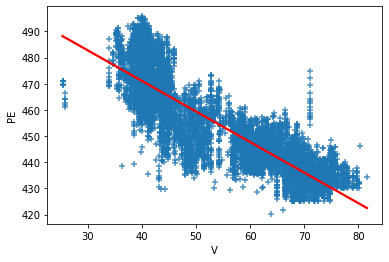


 Simple Linear Regression model results for: AP v/s PE 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:31   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

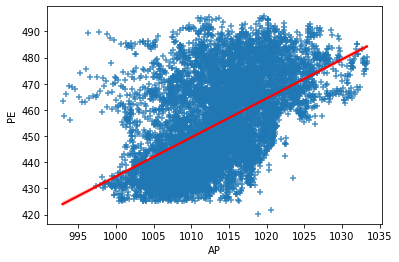


 Simple Linear Regression model results for: RH v/s PE 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:32   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

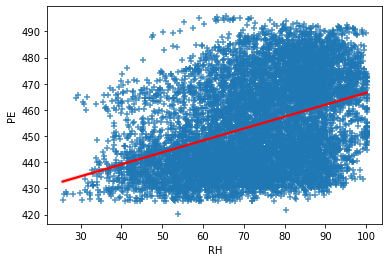

In [7]:

for i in ['AT', 'V', 'AP', 'RH']:
    
    print(f'\n Simple Linear Regression model results for: {i} v/s PE \n')
    
    # Model
    linreg = LinearRegression()

    linfit = linreg.fit(df[[i]], df['PE'])
    xVal = df[i].values
    yVal = df['PE'].values

    #Reshaping the datframes
    xReshape = xVal.reshape(-1,1)
    yReshape = yVal.reshape(-1,1)

    #Adding a constant to center the model
    xReshape = sm.add_constant(xReshape)
    
    #Fitting the model
    modelSLR = sm.OLS(yReshape, xReshape).fit()
    print(modelSLR.summary())
    
    #Plot
    sns.regplot(data=df[[i,'PE']], x=f'{i}', y="PE", marker='+', line_kws={"color": "red"})
    plt.show()

    

In [8]:
print('Since the p-value is less than 0.05 (At a 95% significance level) in all the above 4 cases, all the 4 models are statisically significant. In other words, null hypothesis can be rejected in all 4 models \n')

print('Yes, there are several outliers in all the variables that I would like to remove from the data, to improve model performance')

Since the p-value is less than 0.05 (At a 95% significance level) in all the above 4 cases, all the 4 models are statisically significant. In other words, null hypothesis can be rejected in all 4 models 

Yes, there are several outliers in all the variables that I would like to remove from the data, to improve model performance


### 1(d) - Multiple Linear Regression model

In [9]:
# Model
linreg = LinearRegression()
Xtrain = df[['AT','V','AP','RH']]

multiLinfit = linreg.fit(Xtrain, df['PE'])

#Adding a constant to center the model
Xtrain = sm.add_constant(Xtrain)

#Fitting the model
ModelMLR = sm.OLS(df['PE'], Xtrain).fit()
print(ModelMLR.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:32   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### Describing results

1. The model has an adjusted R-squared value of 0.929 indicating that the model is a great fit for the given dataset
2. There is good chance of mutli-collinearity based on the notes present in the model results, as well as model 
3. The p-values associated with all the variables are <<0.05 indicating that these variables are significant (at 95% significance) in determining the dependent variable 

#### Rejecting null hypothesis

1. The null hypothesis (beta-j = 0) can be rejected at 95% significane for all the 4 independent variables as the p-values associated are less than 0.05

### 1(e) - Comparison of simple and multiple linear regression models

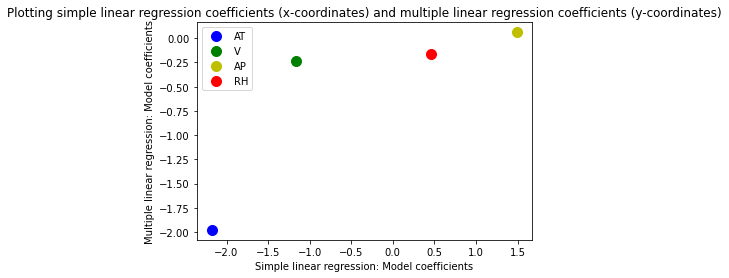

In [10]:
xCoord = [-2.1713,-1.1681,1.4899,0.4557]
yCoord = [-1.9775,-0.2339,0.0621,-0.1581]

labels = ['AT','V','AP','RH']
colors = ['bo','go','yo','ro']

for i,j,k,l in zip(xCoord,yCoord,colors,labels):
    plt.plot(i,j,k,label=l, markersize = 10)
    
plt.title('Plotting simple linear regression coefficients (x-coordinates) and multiple linear regression coefficients (y-coordinates)')
plt.xlabel('Simple linear regression: Model coefficients')
plt.ylabel('Multiple linear regression: Model coefficients')
plt.legend()
plt.show()

### 1(f) - Non-linear evidence check: Fitting a polynomial function to the data

In [11]:
for i in ['AT', 'V', 'AP', 'RH']:
    print(f'\n Polynomial Regression model results for: {i} v/s PE \n')
    
    # Model
    linreg = LinearRegression()

    linfit = linreg.fit(df[[i]], df['PE'])
    xVal = df[i].values
    yVal = df['PE'].values

    #Reshaping the datframes
    xReshape = xVal.reshape(-1,1)
    yReshape = yVal.reshape(-1,1)

    #creating polynomial variable and adding a constant to center the model
    xPolynomial = np.column_stack((xReshape, xReshape**2, xReshape**3))
    xPolynomial = sm.add_constant(xPolynomial)
    modelPoly = sm.OLS(yReshape, xPolynomial).fit()
    
    #Fitting the model
    print(modelPoly.summary())
    
    


 Polynomial Regression model results for: AT v/s PE 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

1. There seems to be evidence of nonlinear association as the x2, x3 coefficients for 3 out of the 4 models are significant
2. Only V v/s PE model does not show evidence of non-linear relationship

### 1(g) - Considering interaction of predictors for association check: Multple linear regression model with pairwise interaction terms

In [12]:
parentList = [['AT','V'],['AT','AP'],['AT','RH'],['V','AP'],['V','RH'],['AP','RH']]
xInt = []

for i in parentList:
    xVal = df[[i[0],i[1]]].values
    xInt.append(xVal[:,0]*xVal[:,1])
    
int0x = pd.DataFrame(xInt[0], columns=['AT-V'])
int1x = pd.DataFrame(xInt[1], columns=['AT-AP'])
int2x = pd.DataFrame(xInt[2], columns=['AT-RH'])
int3x = pd.DataFrame(xInt[3], columns=['V-AP'])
int4x = pd.DataFrame(xInt[4], columns=['V-RH'])
int5x = pd.DataFrame(xInt[5], columns=['AP-RH'])

In [13]:
combDf = [df[['AT', 'V', 'AP', 'RH']], int0x, int1x, int2x, int3x, int4x, int5x]

xTrain = pd.concat(combDf,axis=1)
yTrain = df['PE'].values

#Adding constant
xTrain = sm.add_constant(xTrain)

#Fit the model
modelInt = sm.OLS(yTrain, xTrain).fit()
print(modelInt.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:33   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

1. Among 6 interaction terms, 4 of them (AT-V, AT-RH, V-AP, AP-RH) are statistically significant

### 1(h) -  Creating multiple models as follows:
1. Regression model with all possible interaction terms and quadratic nonlinearities
2. Regression model with significant variables only (eliminating non-significant variables)

#### Creating quadratic variables

In [14]:
quadDf = pd.DataFrame([df['AT']**2,df['V']**2,df['AP']**2,df['RH']**2],index=['AT2','V2','AP2','RH2']).T
combDf_all = [df[['AT', 'V', 'AP', 'RH']], int0x, int1x, int2x, int3x, int4x, int5x,quadDf,df['PE']]
combDf_all = pd.concat(combDf_all,axis=1)

#### Randomly split dataset into 70:30 test-train ratio

In [15]:
trainDf,testDf = train_test_split(combDf_all, train_size=0.7, test_size=0.3, random_state=20)

#### 1. Building model with all variables

In [16]:
 
trainX_all = trainDf.iloc[:,0:14]
trainY_all = trainDf['PE']
testX_all = testDf.iloc[:,0:14]
testY_all = testDf['PE']

trainX_all = sm.add_constant(trainX_all)
modelAll = sm.OLS(trainY_all, trainX_all).fit()
print(modelAll.summary())

pred_trainAll = modelAll.predict(trainX_all)
MSE_trainAll = sklearn.metrics.mean_squared_error(trainY_all, pred_trainAll)
print(f'\nTrain MSE (All) : {MSE_trainAll}')

testX_all = sm.add_constant(testX_all)
pred_testAll = modelAll.predict(testX_all)
MSE_testAll = sklearn.metrics.mean_squared_error(testY_all, pred_testAll)
print(f'Test MSE (All) : {MSE_testAll}')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7348.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:33   Log-Likelihood:                -19118.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6682   BIC:                         3.837e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7216.0547   1451.826     -4.970      0.0

#### 2. Building model with significant variables only

In [17]:

trainX_sigf = trainDf.drop(['AT-AP','V-RH','V2','PE'],axis=1)
trainY_sigf = trainDf['PE']
testX_sigf = testDf.drop(['AT-AP','V-RH','V2','PE'],axis=1)
testY_sigf = testDf['PE']

trainX_sigf = sm.add_constant(trainX_sigf)
modelSigf = sm.OLS(trainY_sigf, trainX_sigf).fit()
print(modelSigf.summary())
pred_trainSigf = modelSigf.predict(trainX_sigf)
MSE_trainSigf = sklearn.metrics.mean_squared_error(trainY_sigf, pred_trainSigf)
print(f'\nTrain MSE (Significant) : {MSE_trainSigf}')

testX_sigf = sm.add_constant(testX_sigf)
pred_testSigf = modelSigf.predict(testX_sigf)
MSE_testSigf = sklearn.metrics.mean_squared_error(testY_sigf, pred_testSigf)
print(f'Test MSE (Significant) : {MSE_testSigf}')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9347.
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:54:33   Log-Likelihood:                -19121.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6685   BIC:                         3.835e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8178.6476   1274.809     -6.416      0.0

### 1(i) -  KNN Regression

#### With raw features

In [18]:
trainDf,testDf = train_test_split(df, train_size=0.7, test_size=0.3, random_state=20)

KNN_Xtrain = trainDf[['AT','V','AP','RH']]
KNN_Ytrain = trainDf[['PE']]
KNN_Xtest = testDf[['AT','V','AP','RH']]
KNN_Ytest = testDf[['PE']]

Best k: 5.0
Minimum Train Error (KNN) : 0.0
Minimum Test Error (KNN) : 16.92631893138279


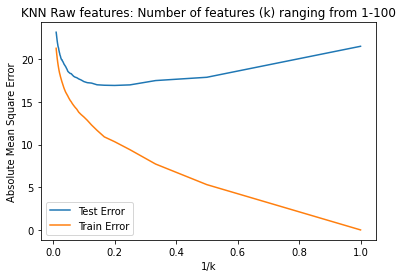

In [19]:
KNN_trainError = []
KNN_testError = []
k_inv = []

for i in range(1,101):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(KNN_Xtrain, KNN_Ytrain)
    KNN_Xtrain_pred = knn.predict(KNN_Xtrain)
    KNN_Xtest_pred = knn.predict(KNN_Xtest)
    
    KNN_trainError.append(sklearn.metrics.mean_squared_error(KNN_Ytrain, KNN_Xtrain_pred))
    KNN_testError.append(sklearn.metrics.mean_squared_error(KNN_Ytest, KNN_Xtest_pred))
    k_inv.append(1/i)
    
    
min_testerror_index = KNN_testError.index(min(KNN_testError))
ideal_k = 1/k_inv[min_testerror_index]
ideal_test_error = KNN_testError[min_testerror_index]
ideal_train_error = KNN_trainError[min_testerror_index]

print(f'Best k: {ideal_k}')
print(f'Minimum Train Error (KNN) : {min(KNN_trainError)}')
print(f'Minimum Test Error (KNN) : {min(KNN_testError)}')

plt.title('KNN Raw features: Number of features (k) ranging from 1-100')
plt.plot(k_inv, KNN_testError, label='Test Error')
plt.plot(k_inv, KNN_trainError, label='Train Error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('Absolute Mean Square Error')
plt.show()

#### With normalized features

In [20]:
df_zscore_temp = df.copy()
df_zscore_temp = pd.DataFrame()
for c in df.columns:
    col_z = c + '_zs'
    df_zscore_temp[col_z] = (df[c] - df[c].mean())/df[c].std(ddof=0)

In [21]:
trainDf,testDf = train_test_split(df_zscore_temp, train_size=0.7, test_size=0.3, random_state=20)
origTrain,origTest = train_test_split(df, train_size=0.7, test_size=0.3, random_state=20)

In [22]:
KNN_Xtrain = trainDf[['AT_zs','V_zs','AP_zs','RH_zs']]
KNN_Ytrain = origTrain[['PE']]
KNN_Xtest = testDf[['AT_zs','V_zs','AP_zs','RH_zs']]
KNN_Ytest = origTest[['PE']]

Best k: 4.0
Minimum Train Error (KNN) : 0.0
Minimum Test Error (KNN) : 15.544998992075934


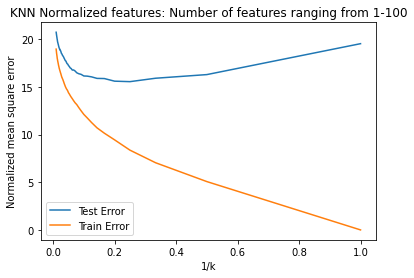

In [23]:
KNN_trainError_norm = []
KNN_testError_norm = []
k_inv = []

for i in range(1,101):
    knn2 = KNeighborsRegressor(n_neighbors = i)
    knn2.fit(KNN_Xtrain, KNN_Ytrain)
    KNN_Xtrain_pred = knn2.predict(KNN_Xtrain)
    KNN_Xtest_pred = knn2.predict(KNN_Xtest)
    
    KNN_trainError_norm.append(sklearn.metrics.mean_squared_error(KNN_Ytrain, KNN_Xtrain_pred))
    KNN_testError_norm.append(sklearn.metrics.mean_squared_error(KNN_Ytest, KNN_Xtest_pred))
    k_inv.append(1/i)

min_testerror_index = KNN_testError_norm.index(min(KNN_testError_norm))
ideal_k = 1/k_inv[min_testerror_index]
ideal_test_error = KNN_testError_norm[min_testerror_index]
ideal_train_error = KNN_trainError_norm[min_testerror_index]
    
print(f'Best k: {ideal_k}')
print(f'Minimum Train Error (KNN) : {min(KNN_trainError_norm)}')
print(f'Minimum Test Error (KNN) : {min(KNN_testError_norm)}')

plt.title('KNN Normalized features: Number of features ranging from 1-100')
plt.plot(k_inv, KNN_testError_norm, label='Test Error')
plt.plot(k_inv, KNN_trainError_norm, label='Train Error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('Normalized mean square error')
plt.show()

### 1(j) - Comparison of KNN Regression results with linear regression model results

In [24]:
print(f'The minimum TEST errors for various models are as follows: \n')
print(f' Regression-All variables: {MSE_testAll}')
print(f' Regression-Significant variables : {MSE_testSigf}')
print(f' KNN-Raw Features: {min(KNN_testError)}')
print(f' KNN-Normalized: {min(KNN_testError_norm)}')

print('\n Based on the above numbers, it can be concluded that the least mean square error for the test data is KNN-Normalized \n Although the differences in error across models are low, the best model to choose here would be KNN with normalized features and k value as 4')

The minimum TEST errors for various models are as follows: 

 Regression-All variables: 19.15208031424826
 Regression-Significant variables : 19.142663975351088
 KNN-Raw Features: 16.92631893138279
 KNN-Normalized: 15.544998992075934

 Based on the above numbers, it can be concluded that the least mean square error for the test data is KNN-Normalized 
 Although the differences in error across models are low, the best model to choose here would be KNN with normalized features and k value as 4
